In [979]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  
from sklearn.svm import SVR  
from sklearn.preprocessing import StandardScaler

    Data Collection & Processing

In [980]:
# Loading Target Data
calories_data = pd.read_csv('calories.csv')

In [981]:
# Sample Target data
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [982]:
# Loading Feature Dataset
excercise_data = pd.read_csv('exercise.csv')

In [983]:
# Sample Feature Dataset
excercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [984]:
# Concatinating Feature and Target data
df = pd.concat([excercise_data,calories_data['Calories']],axis=1)

In [985]:
# Data shape
df.shape

(15000, 9)

In [986]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [987]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [988]:
# checking for null values
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [989]:
# Data description
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


    Data Interpretation & Visulization

In [990]:
# sns.set()

<Axes: xlabel='Gender', ylabel='count'>

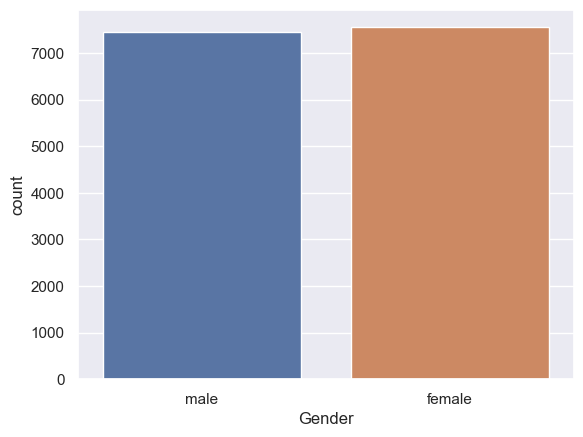

In [991]:
sns.countplot(x=df['Gender'],hue=df['Gender'])

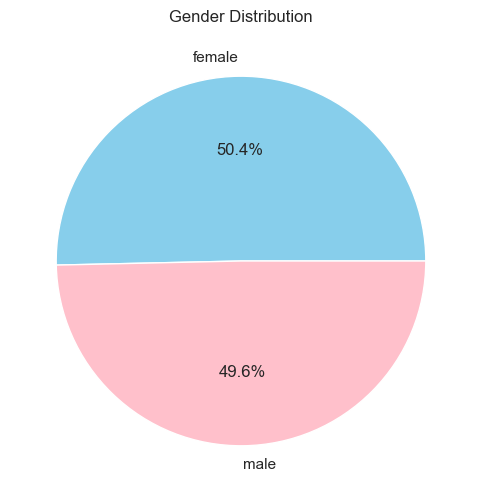

In [992]:
# Gender Distribution (Pie Chart)
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title("Gender Distribution")  # Title of the chart
plt.ylabel("")  # Hide y-label for better appearance
plt.show()

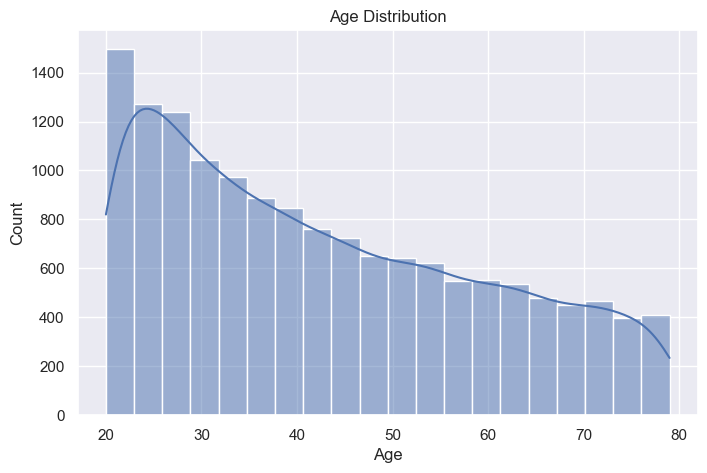

In [993]:
# Age Distribution (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)  # kde=True adds a smooth density curve
plt.title("Age Distribution")  # Chart title
plt.xlabel("Age")  # Label for x-axis
plt.ylabel("Count")  # Label for y-axis
plt.show()

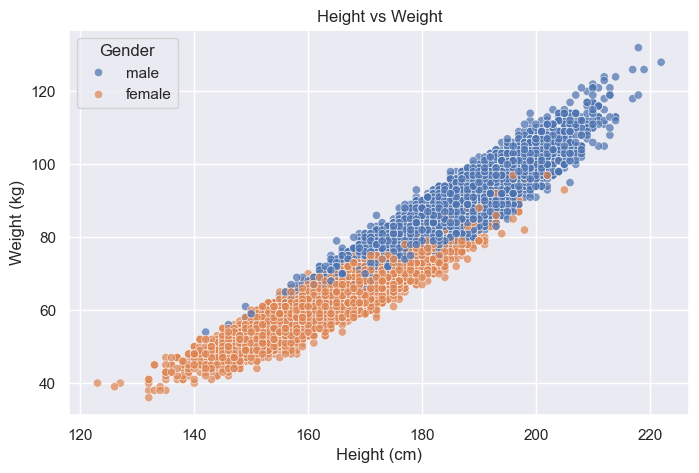

In [994]:
# Scatter Plot (Height vs Weight)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Height'], y=df['Weight'], hue=df['Gender'], alpha=0.7)
plt.title("Height vs Weight")  # Title
plt.xlabel("Height (cm)")  # X-axis label
plt.ylabel("Weight (kg)")  # Y-axis label
plt.show()

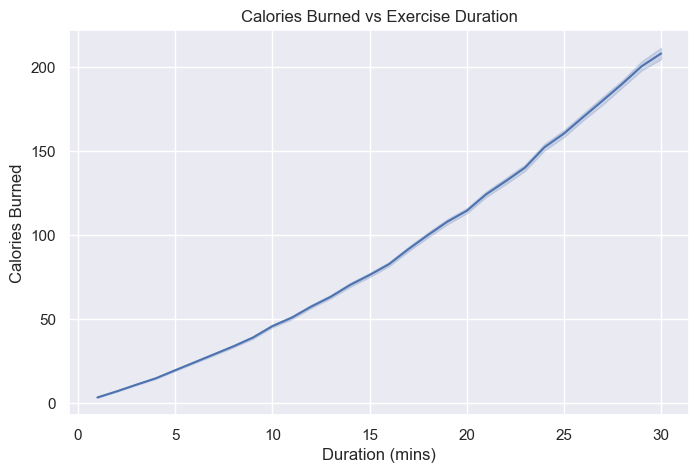

In [995]:
# 4. Calories Burned vs Duration (Line Plot)
plt.figure(figsize=(8, 5))
sns.lineplot(x=df['Duration'], y=df['Calories'])
plt.title("Calories Burned vs Exercise Duration")  # Title
plt.xlabel("Duration (mins)")  # X-axis label
plt.ylabel("Calories Burned")  # Y-axis label
plt.show()

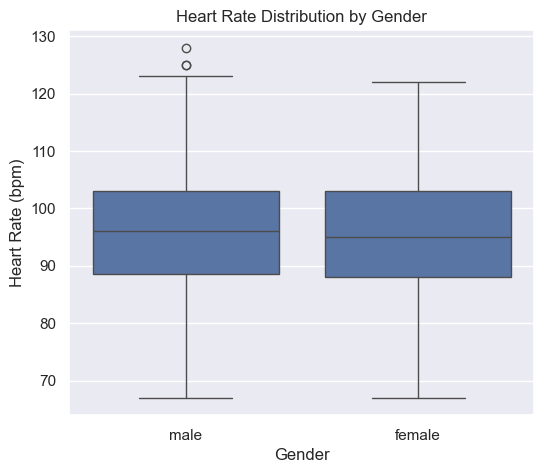

In [996]:
# Box Plot of Heart Rate by Gender
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['Gender'], y=df['Heart_Rate'])
plt.title("Heart Rate Distribution by Gender")  # Title
plt.xlabel("Gender")  # X-axis label
plt.ylabel("Heart Rate (bpm)")  # Y-axis label
plt.show()

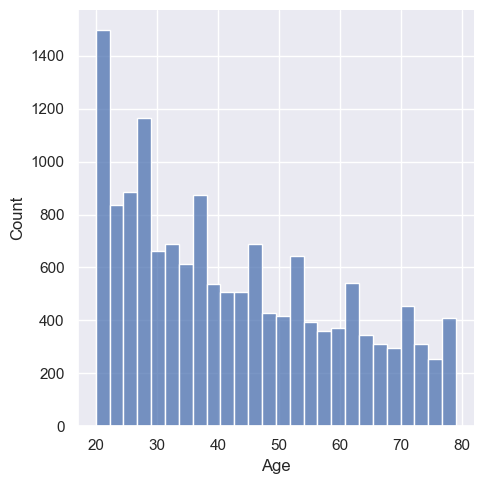

In [997]:
sns.displot(df['Age'])

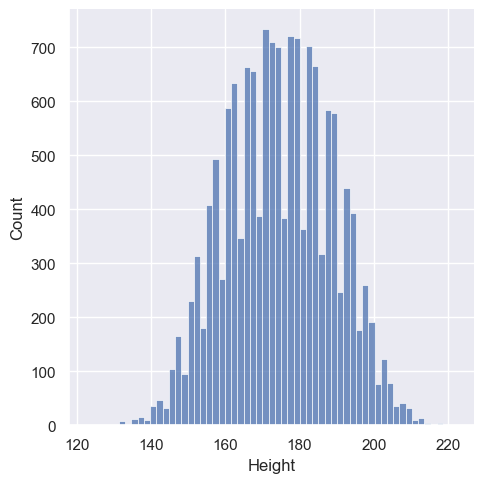

In [998]:
sns.displot(df.Height)

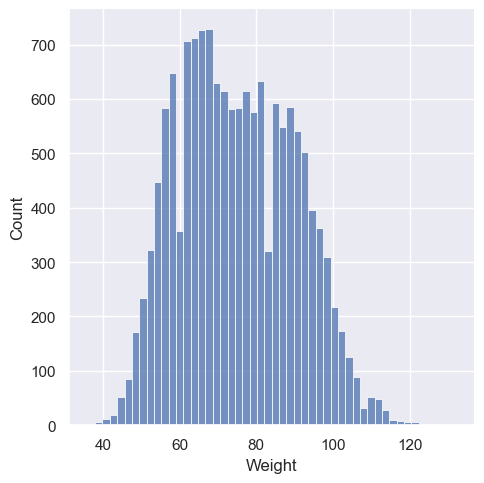

In [999]:
sns.displot(df.Weight)

In [1000]:
# dropping user id column because of no use
df.drop(columns=['User_ID'],inplace=True)

In [1001]:
from sklearn.preprocessing import OneHotEncoder

In [1002]:
# Applying OneHotEncoding on object data
Ohe = OneHotEncoder(sparse_output=False,drop='first')
encoded = Ohe.fit_transform(df[['Gender']])
encoded_df = pd.DataFrame(encoded,columns=['Gender_Male'])
df = pd.concat([df.drop(columns=['Gender']), encoded_df], axis=1)

<Axes: >

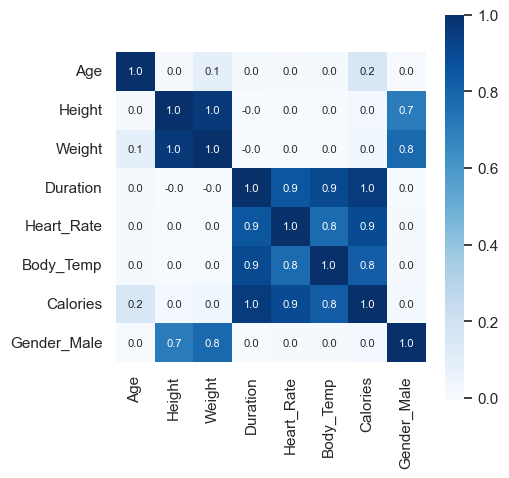

In [1003]:
# Correlation heat map
correlation = df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

    Checking and Removing for Outliers

<Axes: >

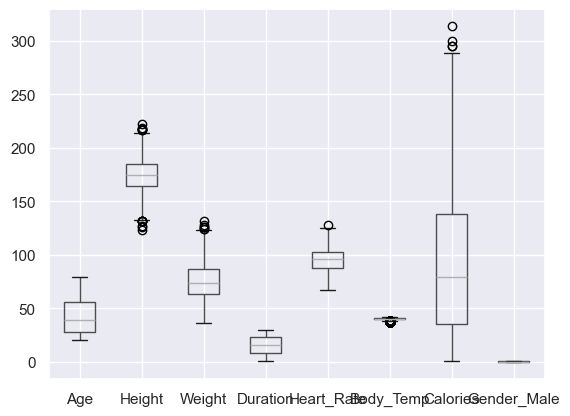

In [1004]:
df.boxplot()

In [1005]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64'])))
outliers = (z_scores > 3).sum()

print("Number of Outliers in Each Column:")
print(outliers)

Number of Outliers in Each Column:
106


In [1006]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("Number of Outliers in Each Column:")
print(outliers)


Number of Outliers in Each Column:
Age              0
Height          14
Weight           6
Duration         0
Heart_Rate       1
Body_Temp      369
Calories         4
Gender_Male      0
dtype: int64


In [1007]:
# Removing outliers directly in dataset 'df' using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Retain only non-outlier data
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Updated Dataset Shape:", df.shape)


Updated Dataset Shape: (14611, 8)


    Train and Test Split

In [1008]:
X = df.drop(columns=['Calories'])
y = df['Calories']

In [1009]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    Standardizing Values

In [1010]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

    Model Training

Gradient Boost Regressor Model

In [1011]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)
y_pred = gb_model.predict(X_test)
gb_mae = metrics.mean_absolute_error(y_pred,y_test)
print(f"GB model's Mean Absolute Error: {gb_mae}")
gb_mse = metrics.mean_squared_error(y_pred,y_test)
print(f"GB model's Mean Squared Error: {gb_mse}")
gb_r2 = metrics.r2_score(y_test, y_pred)
print("rf model's R² Score:", gb_r2)

GB model's Mean Absolute Error: 2.6902936078449984
GB model's Mean Squared Error: 14.32939944997599
rf model's R² Score: 0.996178970682729


Random Forest Regressor Model

In [1012]:
rf_model = XGBRegressor()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_mae = metrics.mean_absolute_error(y_pred,y_test)
print(f"RF model's Mean Absolute Error: {rf_mae}")
rf_mse = metrics.mean_squared_error(y_pred,y_test)
print(f"RF model's Mean Squared Error: {rf_mse}")
rf_r2 = metrics.r2_score(y_test, y_pred)
print("rf model's R² Score:", rf_r2)

RF model's Mean Absolute Error: 1.8603202067863602
RF model's Mean Squared Error: 7.503932282380279
rf model's R² Score: 0.9979990267320074


XGBoost Regression Model

In [1013]:
XGB_model = XGBRegressor()
XGB_model.fit(X_train,y_train)
y_pred = XGB_model.predict(X_test)
XGB_mae = metrics.mean_absolute_error(y_pred,y_test)
print(f"XGB model's Mean Absolute Error: {XGB_mae}")
XGB_mse = metrics.mean_squared_error(y_pred,y_test)
print(f"XGB model's Mean Squared Error: {XGB_mse}")
XGB_r2 = metrics.r2_score(y_test, y_pred)
print("XGB model's R² Score:", XGB_r2)

XGB model's Mean Absolute Error: 1.8603202067863602
XGB model's Mean Squared Error: 7.503932282380279
XGB model's R² Score: 0.9979990267320074


Linear Regression Model

In [1014]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
linear_mae = metrics.mean_absolute_error(y_pred,y_test)
print(f"Linear model's Mean Absolute Error: {linear_mae}")
linear_mse = metrics.mean_squared_error(y_pred,y_test)
print(f"Linear model's Mean Squared Error: {linear_mse}")
linear_r2 = metrics.r2_score(y_test, y_pred)
print("XGB model's R² Score:", linear_r2)

Linear model's Mean Absolute Error: 8.525520089705592
Linear model's Mean Squared Error: 126.51443190005459
XGB model's R² Score: 0.9662640883844715


Decision Tree Regressor Model

In [1015]:
dec_model = DecisionTreeRegressor()
dec_model.fit(X_train,y_train)
y_pred = dec_model.predict(X_test)
dec_mae = metrics.mean_absolute_error(y_pred,y_test)
print(f"DC model's Mean Absolute Error: {dec_mae}")
dec_mse = metrics.mean_squared_error(y_pred,y_test)
print(f"DC model's Mean Squared Error: {dec_mse}")
dec_r2 = metrics.r2_score(y_test, y_pred)
print("DC model's R² Score:", dec_r2)

DC model's Mean Absolute Error: 3.3975367772836127
DC model's Mean Squared Error: 28.502565856996238
DC model's R² Score: 0.9923996019416422


Ridge Regression

In [1016]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
ridge_mae = metrics.mean_absolute_error(y_pred,y_test)
print(f"Ridge model's Mean Absolute Error: {ridge_mae}")
ridge_mse = metrics.mean_squared_error(y_pred,y_test)
print(f"Ridge model's Mean Squared Error: {ridge_mse}")
ridge_r2 = metrics.r2_score(y_test, y_pred)
print("Ridge model's R² Score:", ridge_r2)

Ridge model's Mean Absolute Error: 8.525619350664881
Ridge model's Mean Squared Error: 126.51439928910733
Ridge model's R² Score: 0.9662640970803967


Lasso Regression

In [1017]:
Lasso_model = Lasso()
Lasso_model.fit(X_train,y_train)
y_pred = Lasso_model.predict(X_test)
Lasso_mae = metrics.mean_absolute_error(y_pred,y_test)
print(f"Lasso model's Mean Absolute Error: {Lasso_mae}")
Lasso_mse = metrics.mean_squared_error(y_pred,y_test)
print(f"Lasso model's Mean Squared Error: {Lasso_mse}")
Lasso_r2 = metrics.r2_score(y_test, y_pred)
print("Lasso model's R² Score:", Lasso_r2)

Lasso model's Mean Absolute Error: 9.355031032997324
Lasso model's Mean Squared Error: 152.20506807959447
Lasso model's R² Score: 0.9594135100078928


In [1018]:
df

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_Male
0,68,190.0,94.0,29.0,105.0,40.8,231.0,1.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0,0.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0,1.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0,0.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0,0.0
...,...,...,...,...,...,...,...,...
14995,20,193.0,86.0,11.0,92.0,40.4,45.0,0.0
14996,27,165.0,65.0,6.0,85.0,39.2,23.0,0.0
14997,43,159.0,58.0,16.0,90.0,40.1,75.0,0.0
14998,78,193.0,97.0,2.0,84.0,38.3,11.0,1.0


In [1019]:
new_data = np.array([[69,179,79.0,5.0,88.0,38.7,1],[20,166.0,60.0,14.0,94.0,40.3,0.0],[27,165.0,65.0,6.0,85.0,39.2,0.0]])  # Replace with actual values
new_data_scaled = scaler.transform(new_data)

predicted_calories = dec_model.predict(new_data_scaled)
print(f"Predicted Calories Burned: {predicted_calories}")

Predicted Calories Burned: [26. 66. 23.]


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
